In [19]:
##extend this code to 2D grill at some point

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [58]:
c = 2.99e8 #m/s
pi = np.pi
omega = 4.6e9 * 2*pi


In [166]:
numWaveGuides = 24
w = .0055
d = .0015

phaseDifference = -pi/2
startingPhase = pi

def rect(z):
    #print(z)
    return np.heaviside(z + 1/2, 0) - np.heaviside(z-1/2, 0)

def E_spatial(z):
    E = 0
    for i in range(0,numWaveGuides):
        phase = startingPhase + i*phaseDifference
        E += getE_iAmp(i)*rect((z-(i*(w+d)+w/2))/w)*np.exp(-1j*phase)
    return E

def E_fourier(n_para):#takes in n_||, not k_||
    E = 0
    for i in range(0,numWaveGuides):
        phase = startingPhase + i*phaseDifference
        beta = n_para*(omega/c)*(i*(w + d) + w/2)
        E += getE_iAmp(i)*np.sin(n_para*w*omega/(2*c))*np.exp(-1j*(beta+phase))/(np.sqrt(2*pi)*n_para*omega/(2*c))
    return E

def Power_fourier(n_para):
    prefactor = np.sin(n_para*w*omega/(2*c))**2/np.square(n_para)
    E = 0
    E_conj = 0
    
    for i in range(0,numWaveGuides):
        phase = startingPhase + i*phaseDifference
        beta = n_para*(omega/c)*(i*(w + d) + w/2)
        E_iAmp = getE_iAmp(i)
        
        E += E_iAmp*np.exp(-1j*(beta+phase))
        E_conj += E_iAmp*np.exp(1j*(beta+phase))
        
        
    return prefactor*E*E_conj

#returns amplitude of the electric field in waveguide i
def getE_iAmp(i):
    return 1

<IPython.core.display.Javascript object>


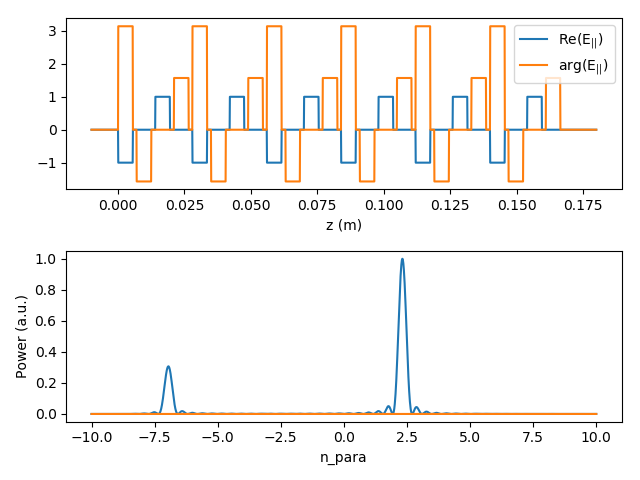

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [169]:
#this depends on frequency because n does, not because the fourier process does
fig, axes = plt.subplots(2)

zs = np.linspace(-.01, .18,2000)
E_spatials = [E_spatial(z) for z in zs];
args = np.angle(E_spatials); args[np.abs(args + pi) < .001] = pi
n_paras = np.linspace(-10, 10, 2000)

Power_fouriers = [Power_fourier(n_para) for n_para in n_paras]

axes[0].plot(zs, np.real(E_spatials), label = r"Re(E$_{||}$)")
#axes[0].plot(zs, np.abs(E_spatials), label = r"|E$_{||}$|")
axes[0].plot(zs, args, label = r"arg(E$_{||}$)")
axes[0].legend(loc = 'best')
axes[0].set_xlabel("z (m)")

axes[1].plot(n_paras, np.abs(Power_fouriers)/np.max(Power_fouriers))
axes[1].plot(n_paras, np.angle(Power_fouriers))
axes[1].set_xlabel("n_para")
axes[1].set_ylabel("Power (a.u.)")
#ax.plot(n_paras, np.angle(E_fouriers))
fig.tight_layout()

fig.show()